<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Sentiment-Analysis/BIDEN_SENTIMENT_ANALYSIS_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GREEK

In [ ]:
!python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.8.0/el_core_news_sm-3.8.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


GREEK

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy

GREEK

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
biden_articles = pd.read_csv("/content/gdrive/MyDrive/Εργασία Python/Articles/biden_articles_20_21.to.csv")

In [ ]:
len(biden_articles)

911

In [ ]:
biden_articles.head(1)

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1228361/m...,Μπάιντεν: Διάγγελμα για το Αφγανιστάν- O Αμερι...,2021-08-31,22:55:19+03:00,ΚΟΣΜΟΣ,Νατάσα Παυλοπούλου,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ...",https://img.bbmd.gr/img/1260/max/82/2021/08/31...,NaN


In [ ]:
short_biden_fa_df = biden_articles[['date',"text_body"]]
short_biden_fa_df = short_biden_fa_df.rename(columns={'text_body': 'text'} )

In [ ]:
short_biden_fa_df.tail()

,date,text
906,2020-09-28,Η πανδημία του κορονοϊού άλλαξε ριζικά τον τρό...
907,2020-09-27,"Σύμφωνα με τις τελευταίες δημοσκοπήσεις, η μάχ..."
908,2020-09-12,«Νομίζω ότι ενδεχομένως εμπλέκονται πιθανώς ου...
909,2020-09-11,Μπάιντεν και Πενς χαιρετίστηκαν «αγγίζοντας» τ...
910,2020-09-08,"Την Ημέρα της Εργασίας (Labor Day), που παραδο..."


In [ ]:
short_biden_fa_df.dtypes

,0
date,object
text,object


In [ ]:
short_biden_fa_df['date'] = pd.to_datetime(short_biden_fa_df['date'], format='%Y-%m-%d')

In [ ]:
short_biden_fa_df.dtypes

,0
date,datetime64[ns]
text,object


In [ ]:
short_biden_fa_df.head()

,date,text
0,2021-08-31,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ..."
1,2021-08-31,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...
2,2021-08-31,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ..."
3,2021-08-30,Viral έχει γίνει στο διαδίκτυο ένα σοκαριστικό...
4,2021-08-30,"Σύμφωνα με την Daily Mail, o Τζο Μπάιντεν ταξί..."


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
# Remove rows with missing values in the 'text' column
short_biden_fa_df = short_biden_fa_df.dropna(subset=['text'])

# Now fit the vectorizer on the cleaned data
matrix = vec.fit_transform(short_biden_fa_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(897, 13161)

In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
trust_words

,word
8,αμην
15,γαμηλιο ταξιδι
24,διευθυντρια σχολειου
38,επικοινωνω
45,εκκλησια
...,...
13039,αληθης
13075,αναμφιβολως
13079,ανυπερβατος
13113,αναθηματικος


In [ ]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df[trust_words].sum(axis=1)

,0
0,14
1,8
2,1
3,9
4,6
...,...
892,11
893,10
894,1
895,6


In [ ]:
short_biden_fa_df.head(3)

,date,text
0,2021-08-31,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ..."
1,2021-08-31,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...
2,2021-08-31,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ..."


In [ ]:
short_biden_fa_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_biden_fa_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_biden_fa_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_biden_fa_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_biden_fa_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_biden_fa_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_biden_fa_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_biden_fa_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_biden_fa_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_biden_fa_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_biden_fa_df.head()

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-08-31,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ...",7.0,26.0,4.0,6.0,3.0,14.0,11.0,9.0,17.0,10.0
1,2021-08-31,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...,9.0,22.0,2.0,3.0,2.0,8.0,13.0,2.0,14.0,9.0
2,2021-08-31,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ...",7.0,10.0,1.0,3.0,1.0,1.0,4.0,1.0,8.0,5.0
3,2021-08-30,Viral έχει γίνει στο διαδίκτυο ένα σοκαριστικό...,9.0,19.0,2.0,11.0,3.0,9.0,8.0,9.0,22.0,16.0
4,2021-08-30,"Σύμφωνα με την Daily Mail, o Τζο Μπάιντεν ταξί...",7.0,13.0,4.0,6.0,7.0,6.0,8.0,7.0,8.0,6.0


In [ ]:
short_biden_fa_df.reset_index(inplace=True)
short_biden_fa_df.set_index('date', inplace=True)
short_biden_fa_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2021-08-31,0,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ...",7.0,26.0,4.0,6.0,3.0,14.0,11.0,9.0,17.0,10.0
2021-08-31,1,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...,9.0,22.0,2.0,3.0,2.0,8.0,13.0,2.0,14.0,9.0
2021-08-31,2,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ...",7.0,10.0,1.0,3.0,1.0,1.0,4.0,1.0,8.0,5.0
2021-08-30,3,Viral έχει γίνει στο διαδίκτυο ένα σοκαριστικό...,9.0,19.0,2.0,11.0,3.0,9.0,8.0,9.0,22.0,16.0
2021-08-30,4,"Σύμφωνα με την Daily Mail, o Τζο Μπάιντεν ταξί...",7.0,13.0,4.0,6.0,7.0,6.0,8.0,7.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,906,Η πανδημία του κορονοϊού άλλαξε ριζικά τον τρό...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-27,907,"Σύμφωνα με τις τελευταίες δημοσκοπήσεις, η μάχ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-12,908,«Νομίζω ότι ενδεχομένως εμπλέκονται πιθανώς ου...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

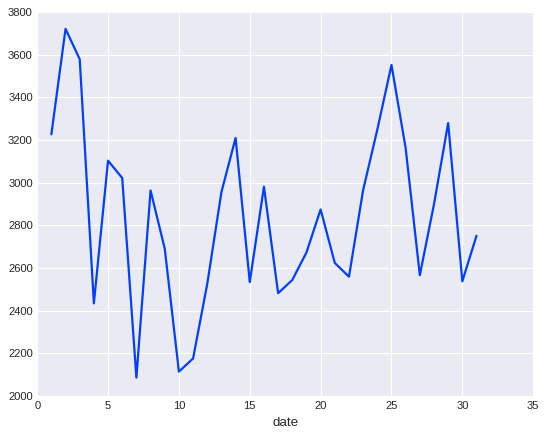

In [ ]:
short_biden_fa_df['text'].str.len().groupby(by=short_biden_fa_df.index.day).mean().plot()

<Axes: xlabel='date'>

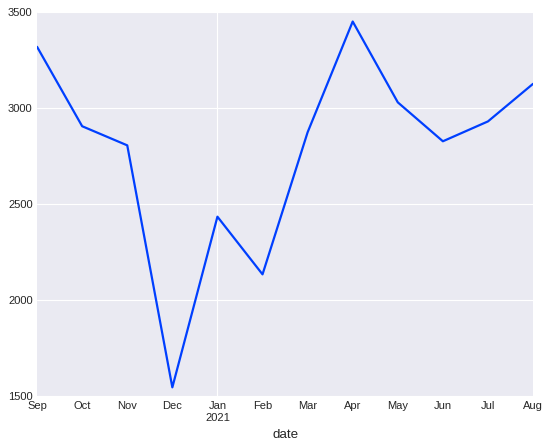

In [ ]:
short_biden_fa_df['text'].str.len().resample('ME').mean().plot()

<Axes: ylabel='date'>

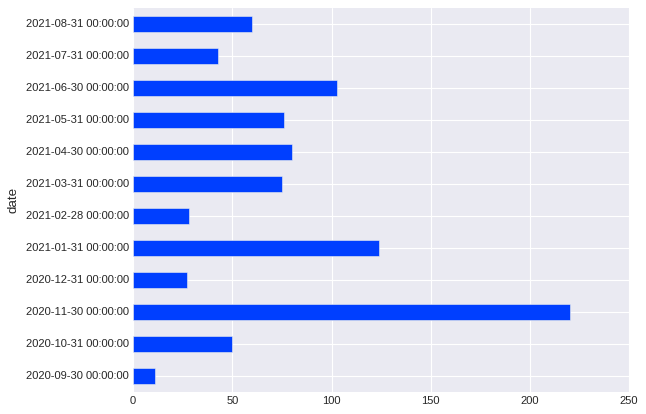

In [ ]:
short_biden_fa_df['text'].resample('ME').count().plot(kind='barh')

**Μετράμε τη θετικότητα/αρνητικότητα και το συναισθηματικό πρόσιμο των άρθρων ανά ημέρα**

<Axes: xlabel='date'>

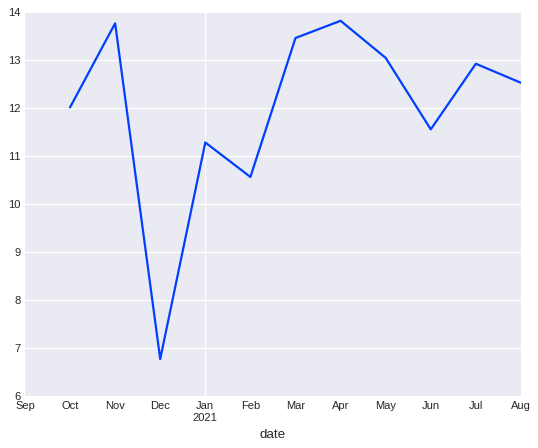

In [ ]:
short_biden_fa_df['positive'].resample('ME').mean().plot()

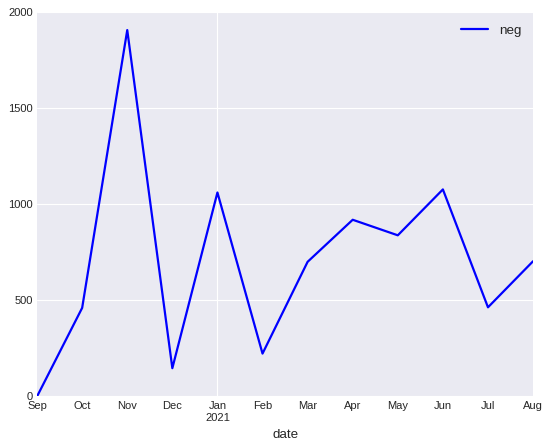

In [ ]:
short_biden_fa_df['negative'].resample('ME').sum().plot(color = 'b',label = 'neg').legend()

Αν έχουμε μεγάλη timeseries μπορούμε να μεγαλώσουμε το μήκος του γρφήματος

<Axes: xlabel='date'>

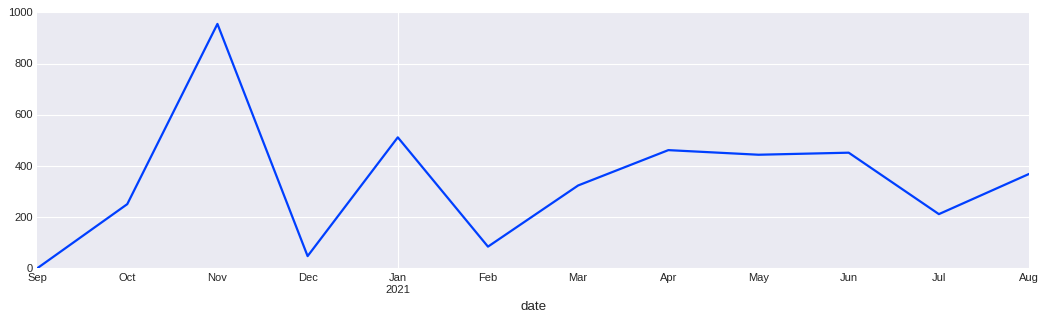

In [ ]:
short_biden_fa_df['anger'].resample('ME').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

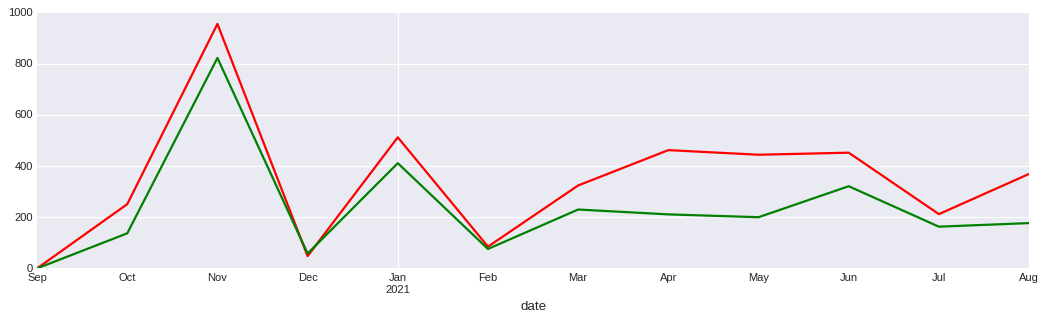

In [ ]:
ax = short_biden_fa_df['anger'].resample('ME').sum().plot(figsize=(16,4), color = 'red')
short_biden_fa_df['joy'].resample('ME').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='date'>

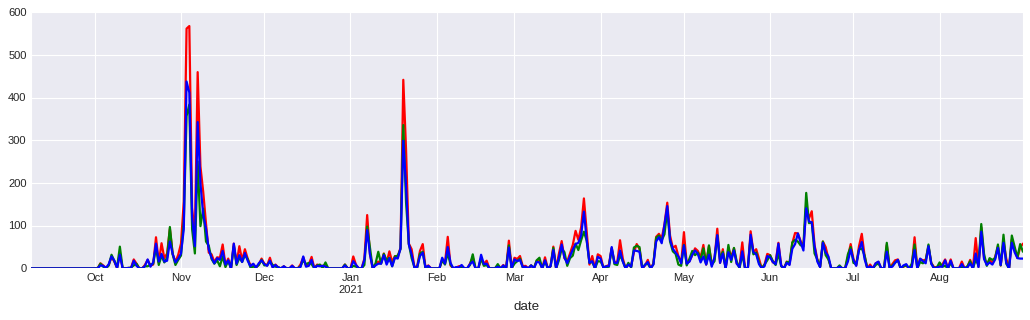

In [ ]:
ax = short_biden_fa_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_biden_fa_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_biden_fa_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
plt.style.use('classic')
plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-bright')

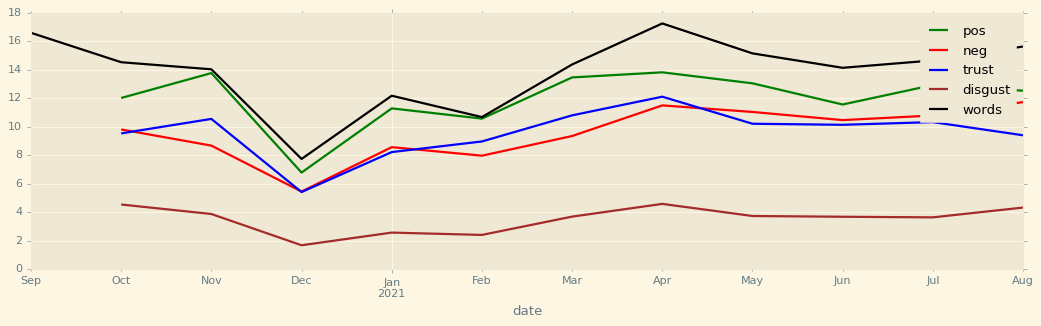

In [ ]:
ax = short_biden_fa_df['positive'].resample('ME').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_biden_fa_df['negative'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_biden_fa_df['trust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_biden_fa_df['disgust'].resample('ME').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_biden_fa_df['text'].str.len().resample('ME').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

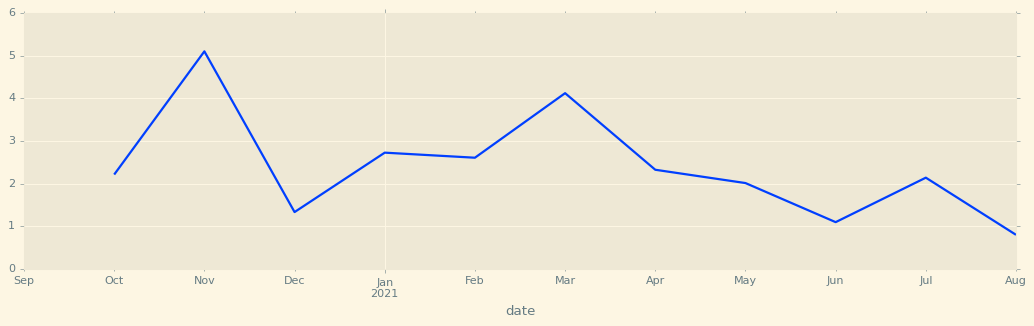

In [ ]:
short_biden_fa_df['pos/neg'] = short_biden_fa_df['positive'] - short_biden_fa_df['negative']
short_biden_fa_df['pos/neg'].resample('ME').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

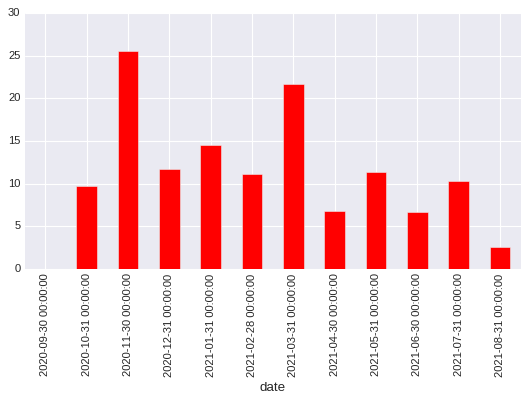

In [ ]:
short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'] = short_biden_fa_df.positive*100//short_biden_fa_df[['positive','negative']].sum(
        axis=1) - short_biden_fa_df.negative*100//short_biden_fa_df[['positive','negative']].sum(axis=1)

short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('ME').mean().plot(kind='bar',
                                                                               color=(short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [ ]:
short_biden_fa_df[(short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'] == short_biden_fa_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2021-06-14,152,1.0,0.0,100.0
2021-06-13,161,2.0,0.0,100.0
2021-06-11,174,1.0,0.0,100.0
2021-05-28,212,4.0,0.0,100.0
2021-05-21,231,5.0,0.0,100.0
2021-05-18,240,2.0,0.0,100.0
2021-05-17,243,0.0,1.0,-100.0
2021-05-07,270,3.0,0.0,100.0
2021-04-25,306,0.0,2.0,-100.0


In [ ]:
temp_df = short_biden_fa_df.reset_index()

In [ ]:
# Use iloc to select rows by their integer position
short_biden_fa_df.iloc[[20,5,0], short_biden_fa_df.columns.get_indexer(['article_url','title', 'text'])]

,(-)αρνητικότητα | θετικότητα(+),(-)αρνητικότητα | θετικότητα(+),text
date,,,
2021-08-25,-15.0,-15.0,"Ο πρόεδρος των ΗΠΑ, ο Τζο Μπάιντεν, υπεραμύνθη..."
2021-08-30,-40.0,-40.0,Αίσθηση προκαλούν οι δηλώσεις μιας Αμερικανίδα...
2021-08-31,21.0,21.0,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ..."
